<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#导入模块与库文件" data-toc-modified-id="导入模块与库文件-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>导入模块与库文件</a></span></li><li><span><a href="#载入mnist数据集" data-toc-modified-id="载入mnist数据集-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>载入mnist数据集</a></span></li><li><span><a href="#CNN卷积网络" data-toc-modified-id="CNN卷积网络-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>CNN卷积网络</a></span><ul class="toc-item"><li><span><a href="#主要函数" data-toc-modified-id="主要函数-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>主要函数</a></span><ul class="toc-item"><li><span><a href="#卷积池化函数" data-toc-modified-id="卷积池化函数-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>卷积池化函数</a></span></li><li><span><a href="#激活函数" data-toc-modified-id="激活函数-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>激活函数</a></span></li><li><span><a href="#交叉熵损失函数与softmax" data-toc-modified-id="交叉熵损失函数与softmax-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>交叉熵损失函数与softmax</a></span></li></ul></li><li><span><a href="#网络结构" data-toc-modified-id="网络结构-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>网络结构</a></span><ul class="toc-item"><li><span><a href="#卷积池化层" data-toc-modified-id="卷积池化层-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>卷积池化层</a></span></li><li><span><a href="#全连接层" data-toc-modified-id="全连接层-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>全连接层</a></span></li></ul></li><li><span><a href="#网络维度" data-toc-modified-id="网络维度-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>网络维度</a></span></li></ul></li><li><span><a href="#模型训练" data-toc-modified-id="模型训练-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>模型训练</a></span><ul class="toc-item"><li><span><a href="#训练参数" data-toc-modified-id="训练参数-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>训练参数</a></span></li><li><span><a href="#训练及结果" data-toc-modified-id="训练及结果-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>训练及结果</a></span></li></ul></li><li><span><a href="#数字图片预测" data-toc-modified-id="数字图片预测-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>数字图片预测</a></span><ul class="toc-item"><li><span><a href="#处理数字图片" data-toc-modified-id="处理数字图片-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>处理数字图片</a></span></li><li><span><a href="#使用模型预测" data-toc-modified-id="使用模型预测-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>使用模型预测</a></span></li></ul></li><li><span><a href="#总结" data-toc-modified-id="总结-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>总结</a></span><ul class="toc-item"><li><span><a href="#实验结果和实验比较" data-toc-modified-id="实验结果和实验比较-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>实验结果和实验比较</a></span></li><li><span><a href="#实验心得" data-toc-modified-id="实验心得-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>实验心得</a></span></li></ul></li></ul></div>

# 导入模块与库文件
* python 3.7
* tensorflow 机器学习库
* PIL 图像处理库
* matplotlib 可视化库
* numpy 科学计算库
* warnings 警告模块（用以忽略警告）

In [12]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 载入mnist数据集
* MNIST_data
 * 训练数据集60k张
 * 训练数据集的标签
 * 测试数据集10k张
 * 测试数据集的标签
* 下载数据集并将文件解压在MNIST_data文件夹里，样本的标签转化为one_hot编码，如样本数字2编码为[0,0,1,...,0]

In [13]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


# CNN卷积网络
   卷积神经网络把图片的全部像素作为输入，内部隐藏层有非全连接的卷积、池化网络，通过卷积核、池化核提取图片局部特征，汇总得到全局信息。过程中使用的权值共享和池化操作大大降低了计算量，提高了计算速率。

## 主要函数

### 卷积池化函数
   * 卷积：每一层有多个卷积核与原图片像素值进行卷积，一张原图像经过n个卷积核映射得到n个新图像，而一个新图像的所有像素值都由一个卷积核求得，实现了权值共享。
   * 池化：保留像素块中灰度值最高的像素点，即保留最主要的特征，如2X2的最大池化把一个2x2的像素块降为1x1的像素块，实现了降采样。

In [3]:
#生成权重
def weight_variable(shape):# shape为列表，shape=[height, width, channels,number]
    #产生截断正态分布随机数，随机数与均值的差值不超过两倍的标准差stddev
    initial = tf.truncated_normal(shape, stddev=0.1)  
    return tf.Variable(initial)  # 对张量进行定义

#生成偏差
def bias_variable(shape):
    #创建一个常量作为初始偏差
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

#conv2d函数的输入参数是要进行卷积的图片x和卷积核W
def conv2d(x, W):
    # stride [1, x_movement, y_movement, 1]
    # Must have strides[0] = strides[3] = 1
    #strides是卷积核步长，width和height方向每隔一个像素移动，步长为1，填充后大小不变
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

#max_pool_2X2函数的输入参数是卷积后的图片x
def max_pool_2x2(x):
    # ksize池化算子  [1,pool_op_length,pool_op_width,1]
    # Must have ksize[0] = ksize[3] = 1
    #2x2max_pool，长度和宽度都为2，width和height方向步长都为2，填充后大小不变。
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

### 激活函数
   * 使用非线性的激活函数能提高模型的分类能力。实验中使用ReLU激活函数，对卷积后的特征进行激活。
$$ ReLU(x)=max(0,x) $$
   * ReLU在输入负值时为0，神经元不被激活；输入正值不变，使得网络在同一时间只有部分神经元被激活，实现了单侧抑制，获得稀疏激活的特性，更有利于拟合训练数据，提高预测正确率。
   * 相比于Sigmoid和Tanh激活函数，ReLU函数在CNN网络中的优势有：1.不存在“饱和区”，也即不存在梯度消失的问题，能在反向传播的迭代更新过程中，对于参数的更新保持较快的收敛速度；2.计算简单，效率高等。

### 交叉熵损失函数与softmax
多分类交叉熵函数
$$-\sum^n_{i=1}y_ilog(\hat{y}_i)$$
$\hat{y}_i$为预测值，$y_i$为标签，本实验有10个分类，使用one-hot编码，只有一个类别$y_i=1$，其他n-1个类别为0。
实验中$$Loss=-\sum_it_ilny_i$$
softmax函数$$y_i=\frac{e^i}{\sum_je^j}=1-\frac{\sum_{j\not=i}e^j}{\sum_je^j}$$
求导
$$\begin{equation}
\begin{aligned}
\frac{\partial Loss_i}{\partial i} & =-\frac{\partial lny_i}{\partial i}\\
&=-\frac{\sum_je^j}{e^i}\cdot\frac{\partial \frac{e_i}{\sum_je^j}}{\partial i}\\
&=-\frac{\sum_je^j}{e^i}\cdot(-\sum_{j\not=i}e^j)\cdot\frac{\partial \frac{1}{\sum_je^j}}{\partial i}\\
&=\frac{\sum_je^j\cdot\sum_{j\not=i}e^j}{e^i}\cdot\frac{-e^i}{(\sum_je^j)^2}\\
&=-\frac{\sum_{j\not=i}e^j}{\sum_je^j}\\
&=-(1-\frac{e^i}{\sum_je^j})\\
&=y_i-1
\end{aligned}
\end{equation}$$
此时损失函数求导非常简单，可以大大简化计算过程。

## 网络结构

In [4]:
# 数据集手写灰度图片像素值一维向量，长度784，placeholder作为占位符分配内存
x = tf.placeholder(tf.float32, [None, 784]) 
# 标签one-hot向量
y_ = tf.placeholder(tf.float32, [None, 10]) 
# x_image=[batch, height, width, channels]是四维张量，由一维向量x转化而来
x_image = tf.reshape(x, [-1, 28, 28, 1])# -1表示任意数量的样本数，灰度图片通道是1

### 卷积池化层

In [5]:
## conv1 ##
# 卷积核 5x5, 输入size=1，输出32个特征向量
W_conv1 = weight_variable([5, 5, 1, 32]) 
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)# 28*28*1 卷积 5*5*1 输出28*28*32  
# 池化输出14*14*32
h_pool1 = max_pool_2x2(h_conv1)  

In [6]:
## conv2 ##
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)# 输出14*14*64
h_pool2 = max_pool_2x2(h_conv2)  # 输出7*7*64

### 全连接层

In [7]:
## 第三层：全连接层  映射激活 ##
# 将7*7*64个神经元映射到1024个神经元
W_fc1 = weight_variable([7 * 7 * 64, 1024])  
b_fc1 = bias_variable([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])
# 对于一个列向量和一个行向量，点乘而不是卷积，再激活
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)  

In [8]:
## 第四层：映射到每种情况的概率##
# 进行dropout前设置每个元素保留下来的概率，此处仅占位
keep_prob = tf.placeholder("float")  
h_fc1_drop = tf.nn.dropout(h_fc1, rate = 1-keep_prob)  # 防止过拟合而使用dropout
W_fc2 = weight_variable([1024, 10])  # 将1024个神经元映射到10个神经元
b_fc2 = bias_variable([10])
# 最后一层使用softmax输出每种情况的概率
y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)  

## 网络维度
   * 输入图片：28x28x1
   * 第一层
       * 卷积核大小、深度、数量：5x5x1x32
       * 卷积后特征向量维度：28x28x32
       * 池化后特征向量维度：14x14x32
   * 第二层
       * 卷积核大小、深度、数量：5x5x32x64
       * 卷积后特征向量维度：14x14x64
       * 池化后特征向量维度：7x7x64
   * 第三层
       * 全连接层权重矩阵维度：(7x7x64)x1024 = 3136x1024
   * 第四层:
       * 全连接层与输出层维度映射：1024x10

# 模型训练

## 训练参数
   * 初始学习率learning_rate=0.0001，设置训练轮数epochs = 500、1000、2000、4000，每次迭代随机选取训练图片数batch_size = 20、50、100、200
   * 损失函数使用交叉熵，优化器使用Adam

## 训练及结果

epochs_total = 1000 ，batch_size = 50
epoch 1： training accuracy 0.1
epoch 200： training accuracy 0.84
epoch 400： training accuracy 0.96
epoch 600： training accuracy 0.98
epoch 800： training accuracy 0.9
epoch 1000： training accuracy 0.96
Test accuracy  is 0.9617.Training completed！
-------------------------------训练过程曲线-------------------------------


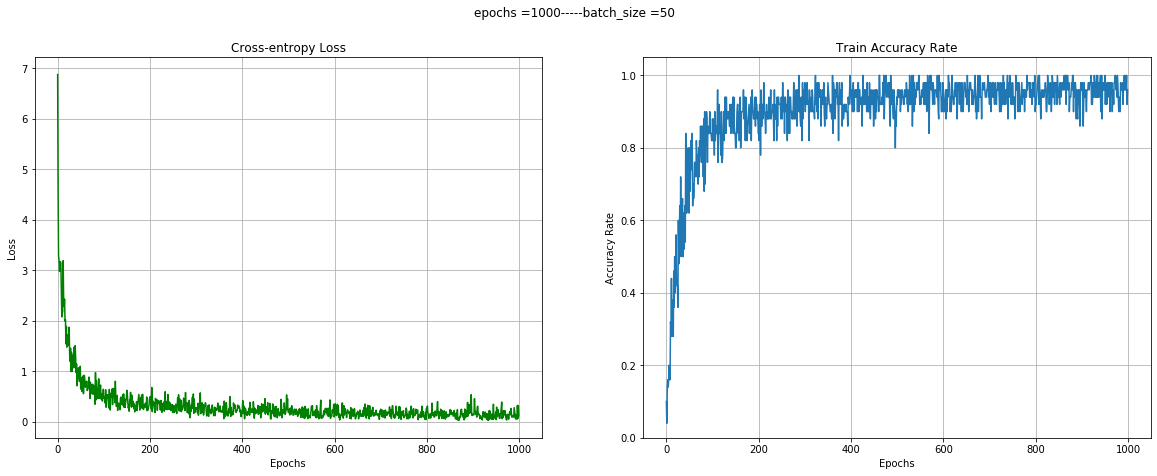

-----------------------------各层特征可视化-------------------------------
训练集中随机抽取一张图片


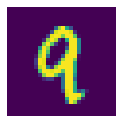

Conv1 28x28x32


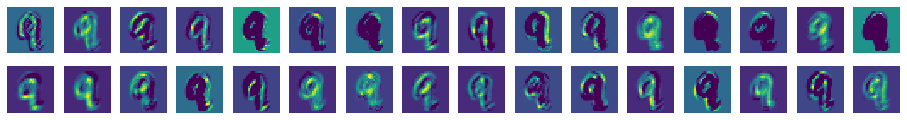

Pool1 14x14x32


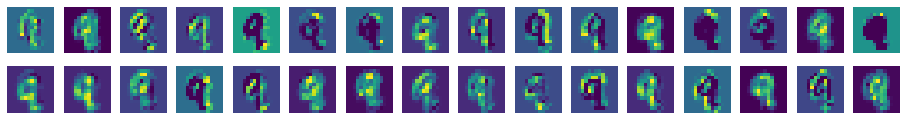

Conv2 14x14x64


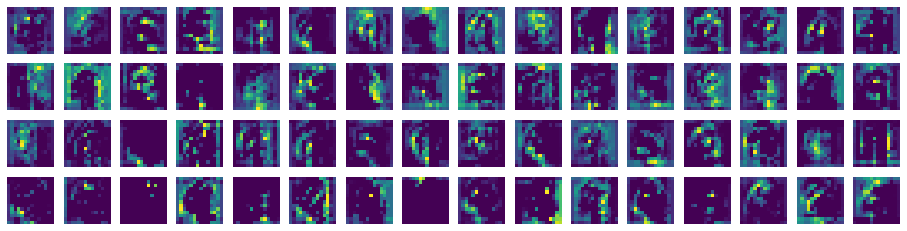

Pool2 7x7x64


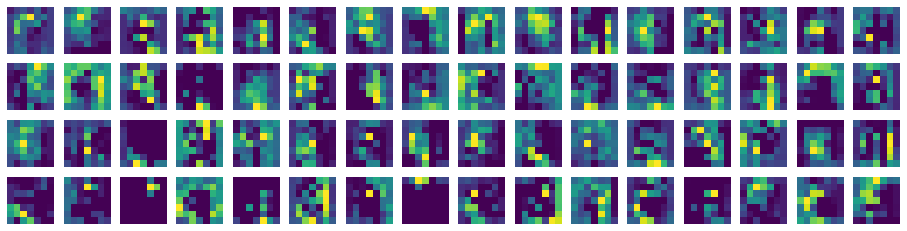

In [14]:
learning_rate = 0.0001 #模型训练的学习率
epochs = 1000 # 训练轮数
batch_size = 50 # 随机选取图片数量
display_epoch = 200 #训练中的测试间隔
# 交叉熵
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_conv), reduction_indices = [1]))
# 优化器使用Adam
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)  
# 将每一行最大元素的索引找出来，找出两个索引数组相等的元素，为True即预测正确
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))  
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))# 将bool转为0/1，预测正确率

saver = tf.train.Saver()  # 训练模型
Acc = []
Loss =[]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print('epochs_total =',epochs,'，batch_size =',batch_size)
    for i in range(epochs):
        batch = mnist.train.next_batch(batch_size)  
        accu = accuracy.eval(session = sess,feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
        loss = cross_entropy.eval(session = sess,feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
        Acc.append(accu)
        Loss.append(loss)
        if i == 0 or ((i+1) % display_epoch == 0):  
        # 每训练display_epoch次，测试一次，不加dropout
            train_accuracy = accuracy.eval(session = sess,feed_dict={
                x: batch[0], y_: batch[1], keep_prob: 1.0})
            print('epoch %d： training accuracy %g' % (i+1, train_accuracy))     
        train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})# 训练时加dropout
    model_type = str(epochs)+'_'+str(batch_size)
    saver.save(sess,'./Model/model1_'+model_type+'.ckpt')
    print('Test accuracy  is %g.Training completed！' % accuracy.eval(feed_dict={
        x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))  # 测试时不加dropout
    print('-------------------------------训练过程曲线-------------------------------')
    
    #绘制代价函数曲线
    fig1,ax1 = plt.subplots(nrows=1, ncols=2,figsize=(20,7))
    plt.subplot(1,2,1)
    plt.plot(Loss,color='green', label='Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Cross-entropy Loss')
    plt.grid()
    # 准确率曲线    
    plt.subplot(1,2,2)
    plt.plot(Acc)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy Rate')
    plt.title('Train Accuracy Rate')
    plt.ylim(0,1.05)
    plt.grid()
    plt.savefig(str(epochs)+'_'+str(batch_size)+'.jpg')
    plt.suptitle('epochs ='+str(epochs)+'-----batch_size ='+str(batch_size))
    plt.show()
#----------------------------------各个层特征可视化-------------------------------
    print('-----------------------------各层特征可视化-------------------------------')
    print('训练集中随机抽取一张图片')
    fig2,ax2 = plt.subplots(figsize=(2,2))
    ax2.imshow(np.reshape(mnist.train.images[11], (28, 28)))#选取训练集中的一张图片
    plt.axis('off') # 不显示坐标轴
    plt.show()
    
    # 第一层的卷积输出的特征图
    print('Conv1 28x28x32')
    input_image = mnist.train.images[11:12]
    conv1_32 = sess.run(h_conv1, feed_dict={x:input_image})   
    conv1_transpose = sess.run(tf.transpose(conv1_32, [3, 0, 1, 2]))
    fig3,ax3 = plt.subplots(nrows=2, ncols=16, figsize = (16,2))
    for i in range(32):
        plt.subplot(2,16,i+1)
        plt.imshow(conv1_transpose[i][0])
        plt.axis('off') # 不显示坐标轴
    plt.show()
    
    # 第一层池化后的特征图
    print('Pool1 14x14x32')
    pool1_32 = sess.run(h_pool1, feed_dict={x:input_image}) 
    pool1_transpose = sess.run(tf.transpose(pool1_32, [3, 0, 1, 2]))
    fig4,ax4 = plt.subplots(nrows=2, ncols=16, figsize=(16,2))
    for i in range(32):
        plt.subplot(2,16,i+1)
        plt.imshow(pool1_transpose[i][0])
        plt.axis('off')
    plt.show()
    
    # 第二层卷积输出特征图
    print('Conv2 14x14x64')
    conv2_64 = sess.run(h_conv2, feed_dict={x:input_image})  
    conv2_transpose = sess.run(tf.transpose(conv2_64, [3, 0, 1, 2]))
    fig5,ax5 = plt.subplots(nrows=4, ncols=16, figsize = (16, 4))
    for i in range(64):
        plt.subplot(4,16,i+1)
        plt.imshow(conv2_transpose[i][0])
        plt.axis('off')
    plt.show()
    
    # 第二层池化后的特征图
    pool2_64 = sess.run(h_pool2, feed_dict={x:input_image})  
    pool2_transpose = sess.run(tf.transpose(pool2_64, [3, 0, 1, 2]))
    fig6,ax6 = plt.subplots(nrows=4, ncols=16, figsize = (16, 4))
    print('Pool2 7x7x64')
    for i in range(64):
        plt.subplot(4,16,i+1)
        plt.imshow(pool2_transpose[i][0])
        plt.axis('off')
    plt.show()

# 数字图片预测

## 处理数字图片

In [10]:
def imageprepare(add):
    file_name = add  # 导入自己的图片地址
    # in terminal 'mogrify -format png *.jpg' convert jpg to png
    im = Image.open(file_name)
    plt.imshow(im)
    plt.axis('off')
    plt.show()
    im = im.convert('L')  # 黑白
    tv = list(im.getdata())  # 得到像素值
    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    return tva

## 使用模型预测

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./Model/model1_4000_100.ckpt
----------------------------------输入第1张手写图片----------------------------------


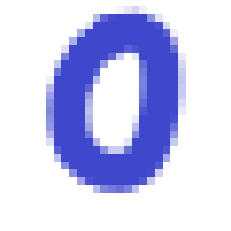

识别图片数字为: 0
----------------------------------输入第2张手写图片----------------------------------


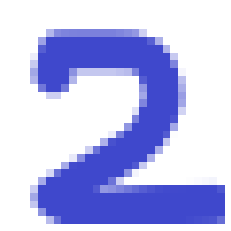

识别图片数字为: 2
----------------------------------输入第3张手写图片----------------------------------


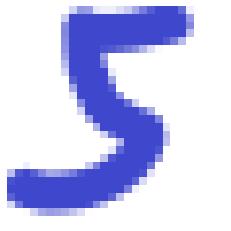

识别图片数字为: 5
----------------------------------输入第4张手写图片----------------------------------


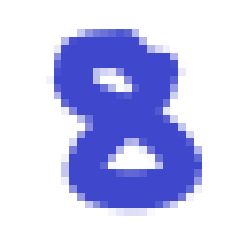

识别图片数字为: 8
----------------------------------输入第5张手写图片----------------------------------


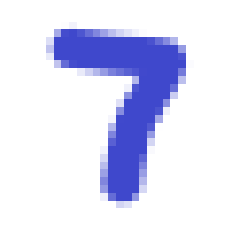

识别图片数字为: 7


In [11]:
tf.reset_default_graph()
a='D:\课件&作业\大三下\模式识别\CNN手写体\JN\数字'
address = ['0.png','2.png','5.png','8.png','7.png']

x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1, 28, 28, 1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, rate = 1-keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./Model/model1_4000_100.ckpt")  # 这里使用了之前保存的模型参数
    prediction = tf.argmax(y_conv, 1)  # 返回预测值的序号
    for i in range(5):
        print('----------------------------------输入第%d张手写图片----------------------------------'%(i+1))
        predint = prediction.eval(feed_dict={x: [imageprepare(a+address[i])], keep_prob: 1.0}, session=sess)
        print('识别图片数字为:',predint[0])

# 总结
## 实验结果和实验比较
   * 本实验搭建了一个CNN卷积神经网络，对MNIST数据集进行训练，得到数字图片的分类器，分类的准确度为98%以上。
   * 对卷积过程进行可视化，观察到不同卷积核对于相同图片不同特征的提取情况。
   * 实现对自己的手写图片进行处理及分类识别。
   * 实验过程中对epochs和batch_size两个参数进行简单探究，比较两个参数的变化对于分类的损失和准确度的影响，汇总如下：
   

* 1.在一定范围内，随着epochs的增加（本实验为500、1000、2000、4000，保持batch size=100），分类准确度增加，但增长幅度变小

|$epoch$  |$accuracy$|
|-----|---|
|500 |0.9553|
|1000|0.9714|
|2000|0.9810|
|4000|0.9861|

$ epoch=500,batch size=100 $

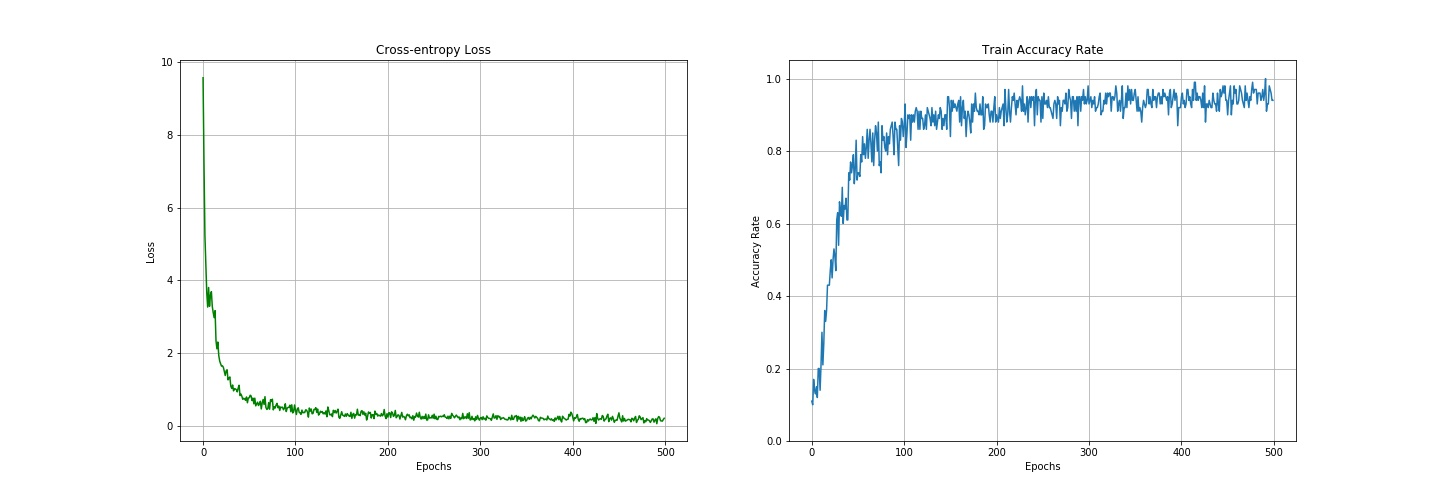

$ epoch=1000,batch size=100 $

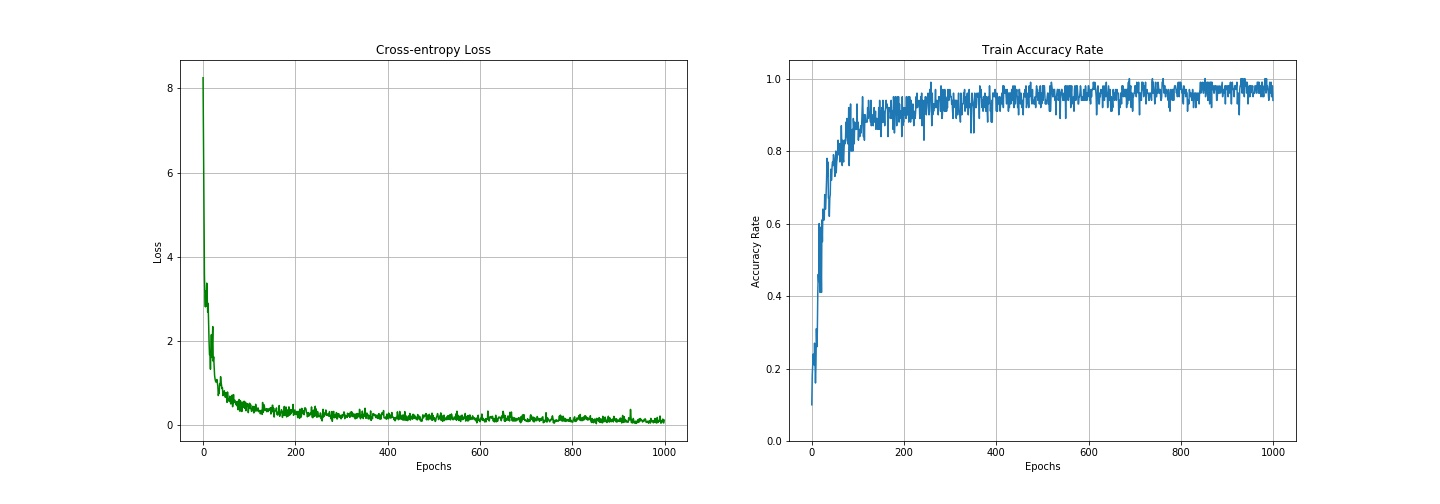

$ epoch=2000,batch size=100 $

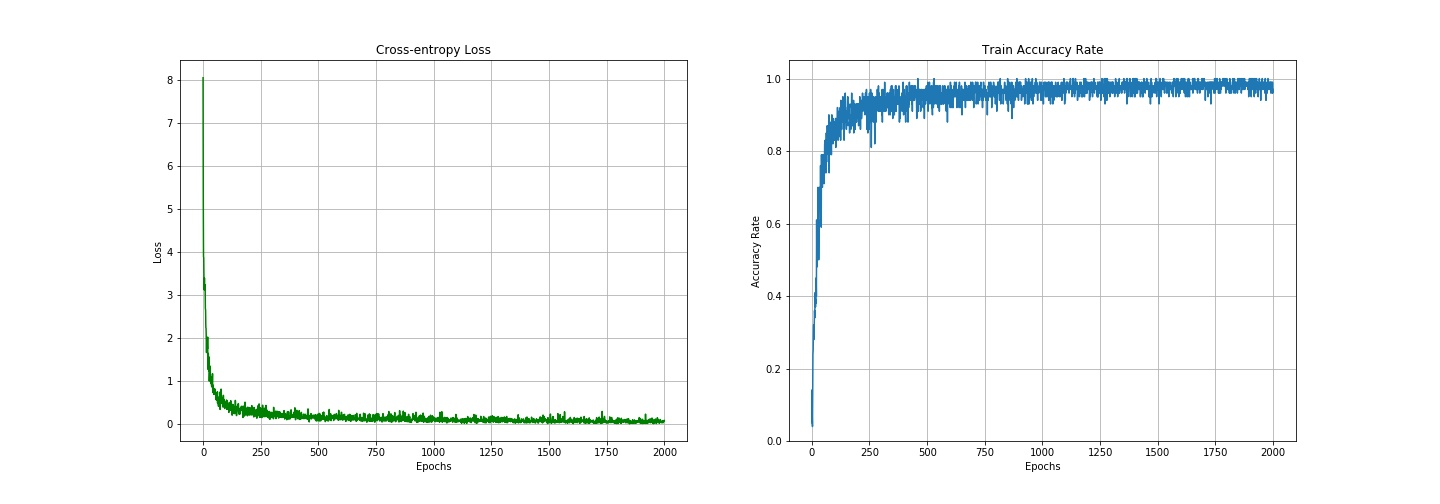

$ epoch=4000,batch size=100 $

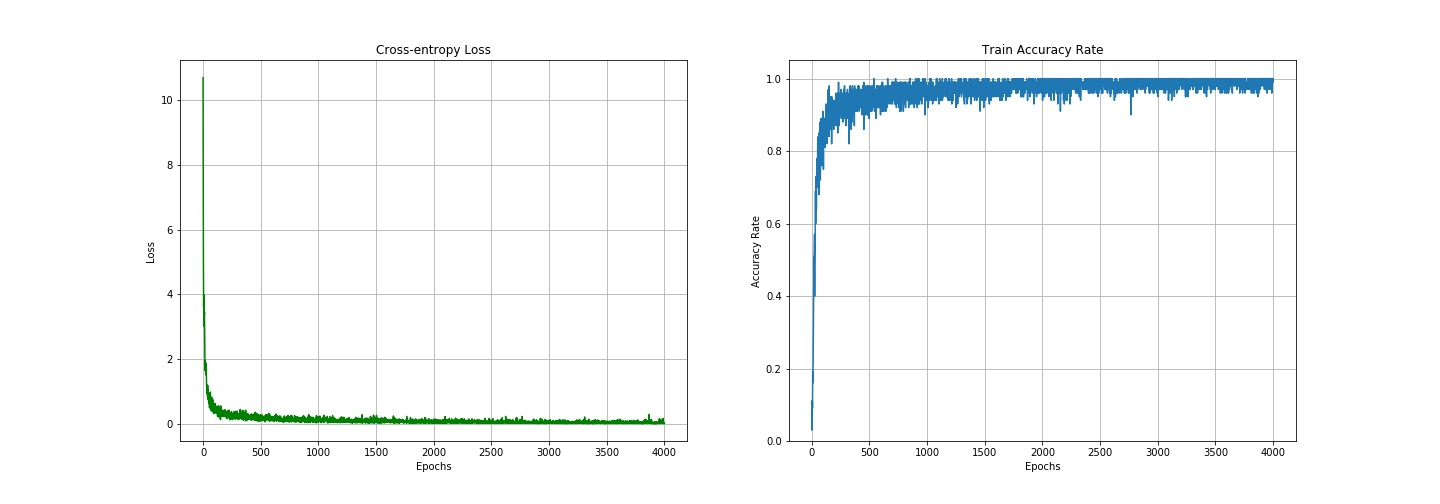

* 2.在一定范围内，随着batch size的增大（本实验为20、50、100、2000，保持epochs=1000），分类准确度增加，震荡减缓，增长幅度变小

|$batch size$|$ accuracy$|
|----------|---|
|20|0.9531|
|50|0.9617|
|100|0.9714|
|200|0.9739|

$ batch size=20,epoch=1000 $

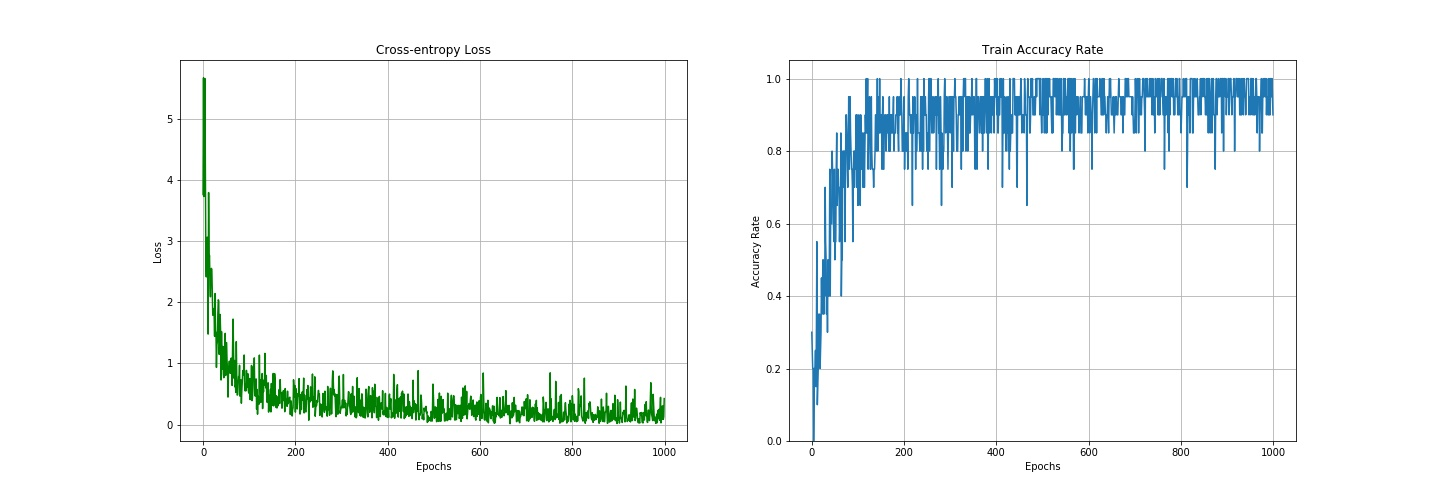

$ batch size=50,epoch=1000 $

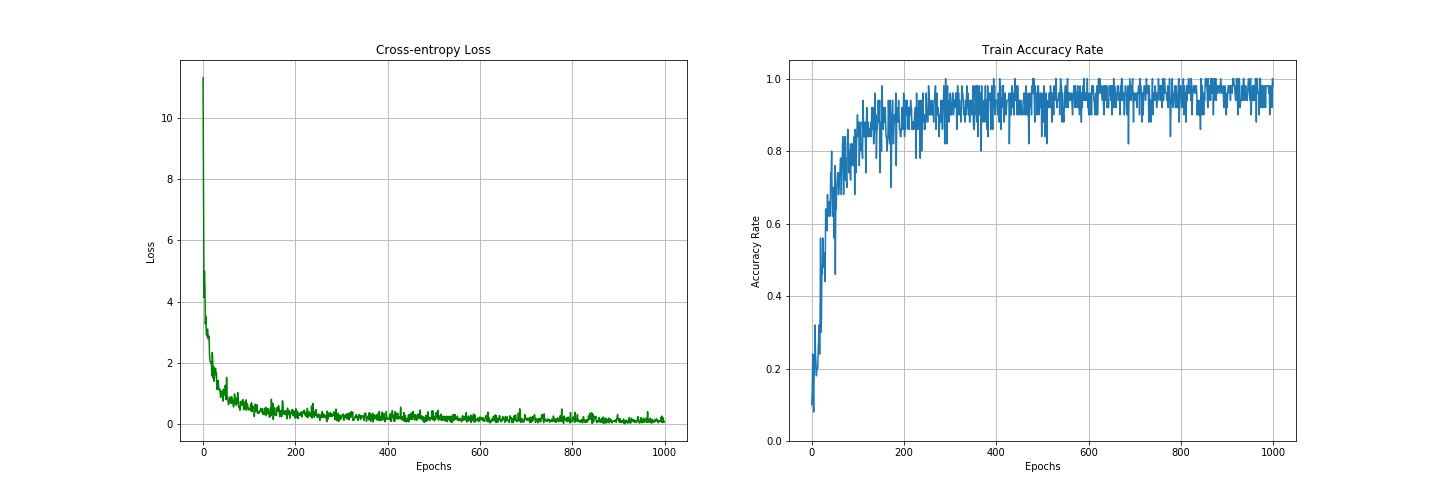

$ batch size=100,epoch=1000 $

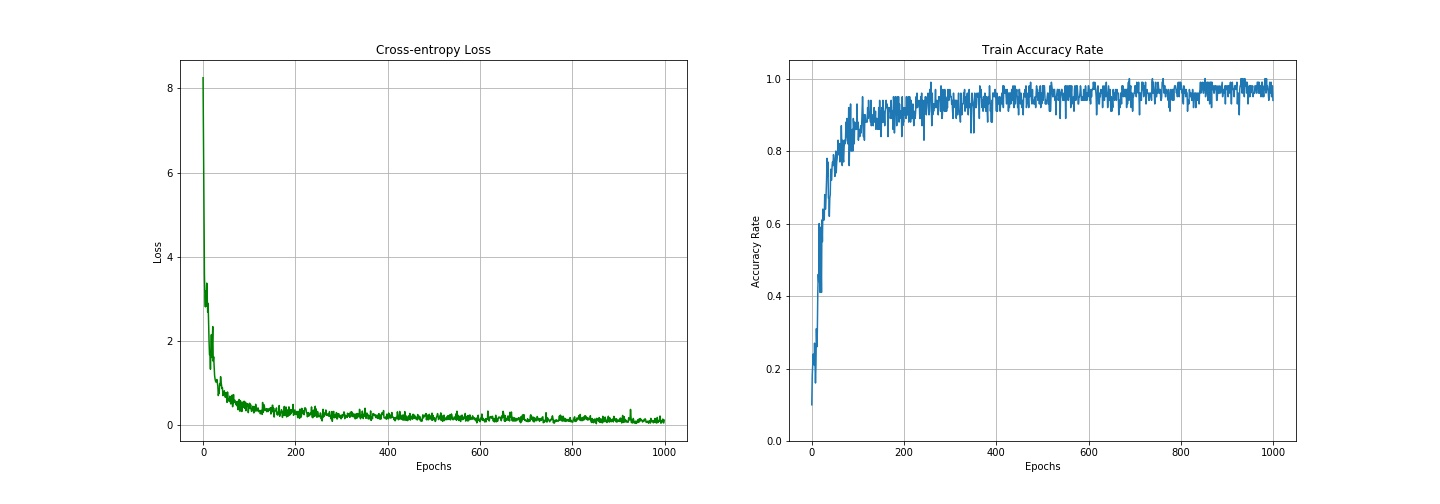

$ batch size=200,epoch=1000 $

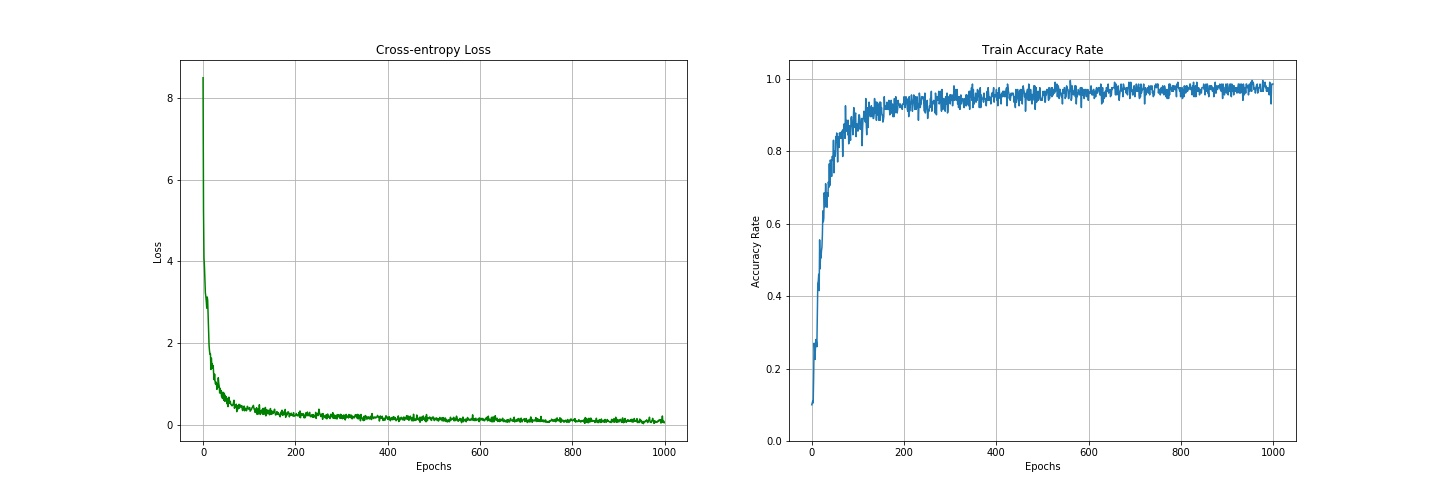

## 实验心得
MNIST手写体分类是CNN网络中的“hello world”，但我们两人希望能比较完整地展现这个网络的原理和结构，所以在具体分析和编写代码之外，加入了我们对于该网络的进一步探究，比如卷积特征提取的可视化、对模型的应用以及模型调参的效果，以上实验内容也是我们学习CNN网络的完整过程。通过这次对CNN网络的实践学习，我们掌握卷积网络相关知识的同时，也感受到了深度学习这门学课的难度，以及数学在实践中应用的魅力所在。